<a href="https://colab.research.google.com/github/eriiin/DataAnalysis_StrokePrediction/blob/main/NEW_Machine_learning%26Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
import plotly.express as px

In [88]:
from scipy.stats import normaltest
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [89]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

In [90]:
dat = pd.read_csv('washed_newfeatures.csv')  # Read original dataset
d = dat.copy()  # backup
print(d.shape)

(3566, 20)


In [91]:
#d.drop(columns=['id'], inplace=True)  # ID item has nothing to do with subsequent analysis
#print(d.info())  

In [92]:
print(d.describe())

        Unnamed: 0       gender          age  hypertension  heart_disease  \
count  3566.000000  3566.000000  3566.000000   3566.000000    3566.000000   
mean   1782.500000     0.394560    48.853898      0.125070       0.063937   
std    1029.559857     0.488824    18.874375      0.330845       0.244675   
min       0.000000     0.000000    10.000000      0.000000       0.000000   
25%     891.250000     0.000000    34.000000      0.000000       0.000000   
50%    1782.500000     0.000000    50.000000      0.000000       0.000000   
75%    2673.750000     1.000000    63.000000      0.000000       0.000000   
max    3565.000000     1.000000    82.000000      1.000000       1.000000   

       ever_married    work_type  Residence_type  avg_glucose_level  \
count   3566.000000  3566.000000     3566.000000        3566.000000   
mean       0.759955     3.424846        0.508693         108.982011   
std        0.427170     0.894640        0.499995          48.292204   
min        0.000000   

In [93]:
def missing_data_table(data):  #The parameter data represents the data set to be processed
    t = data.isnull().sum().sort_values(ascending=False)  # Number of missing values for each variable in the dataset
    p = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)  # Proportion of missing values
    missing_data = pd.concat([t, p], axis=1, keys=['total', 'percent'])
    return missing_data
print(missing_data_table(d))

                             total  percent
Unnamed: 0                       0      0.0
gender                           0      0.0
ever_married_heart_disease       0      0.0
ever_married_smoking_status      0      0.0
work_type_Residence_type         0      0.0
age_avg_glucose_level            0      0.0
age_heart_disease                0      0.0
age_hypertension                 0      0.0
age_bmi                          0      0.0
stroke                           0      0.0
smoking_status                   0      0.0
bmi                              0      0.0
avg_glucose_level                0      0.0
Residence_type                   0      0.0
work_type                        0      0.0
ever_married                     0      0.0
heart_disease                    0      0.0
hypertension                     0      0.0
age                              0      0.0
bmi_heart_disease                0      0.0


In [94]:
#d = d.fillna(np.mean(d['bmi']))  # Use average to fill missing

In [95]:
d_n = d[['age', 'avg_glucose_level', 'bmi']]
d_c = d[['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']]  # 分类变量

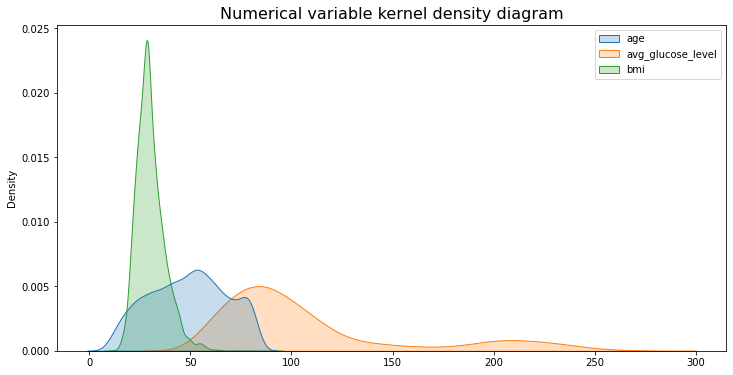

In [96]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=d_n, shade=True)  # Plot the kernel density of numerical variables
plt.title('Numerical variable kernel density diagram', fontproperties='SimHei', fontsize=16)
plt.show()

In [97]:
sk = list()
for i in d_n.columns:
   # Calculate the kurtosis and skewness of each numerical variable, and test the normality based on kurtosis and skewness
   sk.append([i,d_n[i].skew(),d_n[i].kurt(),list(normaltest(d_n[i]))[0],list(normaltest(d_n[i]))[1]])  
sk_result = pd.DataFrame(sk, columns=['Variable name', 'skewness', 'kurtosis', 'statistic', 'P value']) 
print(sk_result)

       Variable name  skewness  kurtosis   statistic        P value
0                age -0.065152 -0.961911  661.510809  2.263357e-144
1  avg_glucose_level  1.439089  1.050661  782.403177  1.268554e-170
2                bmi  1.246459  3.722057  894.498912  5.781349e-195


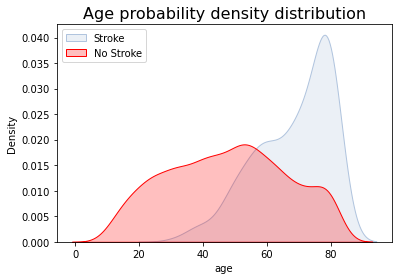

In [98]:
# Age probability density distribution
sns.kdeplot(d.loc[d['stroke'] == 1]['age'], color='#B0C4DE', label='Stroke', shade=True)
sns.kdeplot(d.loc[d['stroke'] == 0]['age'], color='#FF0000', label='No Stroke', shade=True)
plt.title('Age probability density distribution', fontproperties='SimHei', fontsize=16)
plt.legend(loc=2)
plt.show()

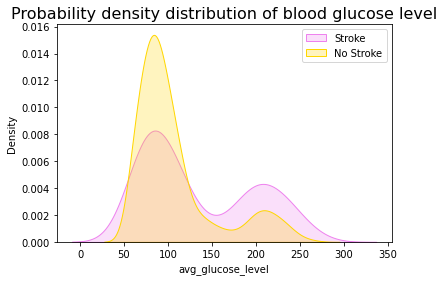

In [99]:
# Probability density distribution of blood glucose level
sns.kdeplot(d.loc[d['stroke']==1]['avg_glucose_level'],color='#EE82EE',label='Stroke',shade=True)
sns.kdeplot(d.loc[d['stroke']==0]['avg_glucose_level'],color='#FFD700',label='No Stroke',shade=True)
plt.title('Probability density distribution of blood glucose level', fontproperties='SimHei', fontsize=16)
plt.legend(loc=1)
plt.show()

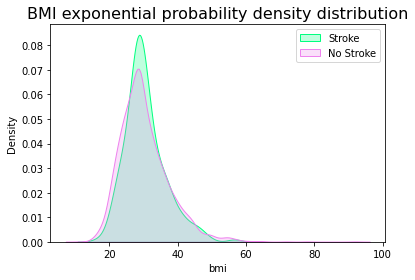

In [100]:
# BMI exponential probability density distribution
sns.kdeplot(d.loc[d['stroke'] == 1]['bmi'], color='#00FF7F', label='Stroke', shade=True)
sns.kdeplot(d.loc[d['stroke'] == 0]['bmi'], color='#EE82EE', label='No Stroke', shade=True)
plt.title('BMI exponential probability density distribution', fontproperties='SimHei', fontsize=16)
plt.legend(loc=1)
plt.show()

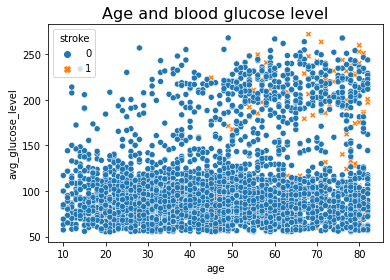

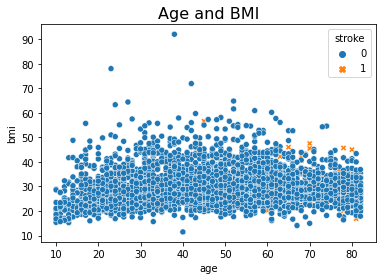

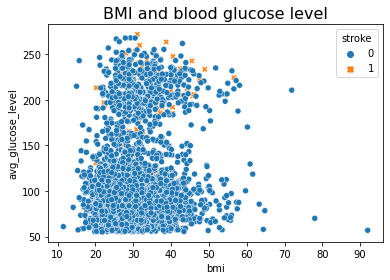

In [101]:
# Age and blood glucose level
sns.scatterplot(x=d_n['age'], y=d_n['avg_glucose_level'], hue=d_c['stroke'], style=d_c['stroke'])
plt.title('Age and blood glucose level', fontproperties='SimHei', fontsize=16)
plt.show()
# Age and BMI
sns.scatterplot(x=d_n['age'], y=d_n['bmi'], hue=d_c['stroke'], style=d_c['stroke'])
plt.title('Age and BMI', fontproperties='SimHei', fontsize=16)
plt.show()
# BMI and blood glucose level
sns.scatterplot(x=d_n['bmi'], y=d_n['avg_glucose_level'], hue=d_c['stroke'], style=d_c['stroke'])
plt.title('BMI and blood glucose level', fontproperties='SimHei', fontsize=16)
plt.show()

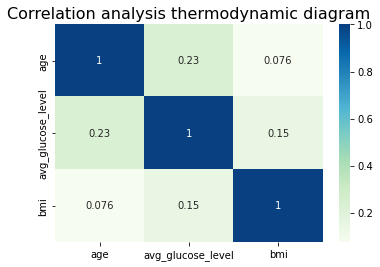

In [102]:
# Correlation analysis thermodynamic diagram
num_cor = d_n.corr()  # Calculate the correlation coefficient between two variables
sns.heatmap(data=num_cor, annot=True, cmap='GnBu')
plt.title('Correlation analysis thermodynamic diagram', fontproperties='SimHei', fontsize=16)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

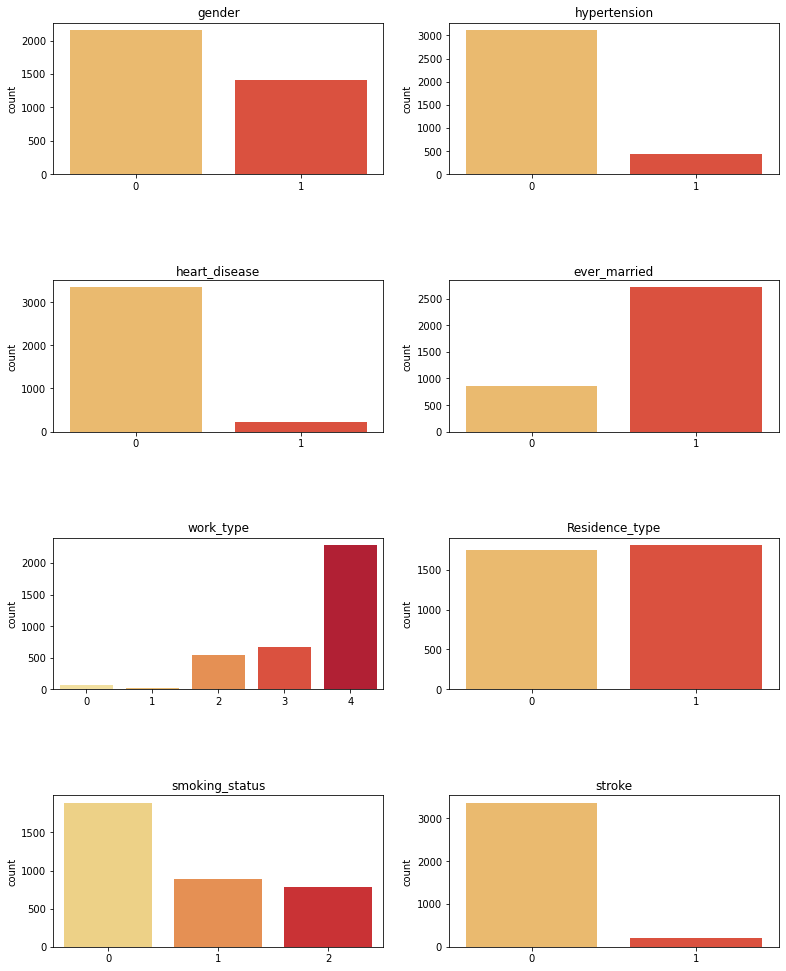

In [103]:
fig = plt.figure(figsize=(13, 17))
for a, b in enumerate(d_c.columns):
    ax = plt.subplot(4, 2, a+1)
    ax.set_title(b)
    sns.countplot(d_c[b], palette='YlOrRd')  # Draw bar chart of each category variable
    ax.set_xlabel('')
plt.subplots_adjust(hspace=0.7)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

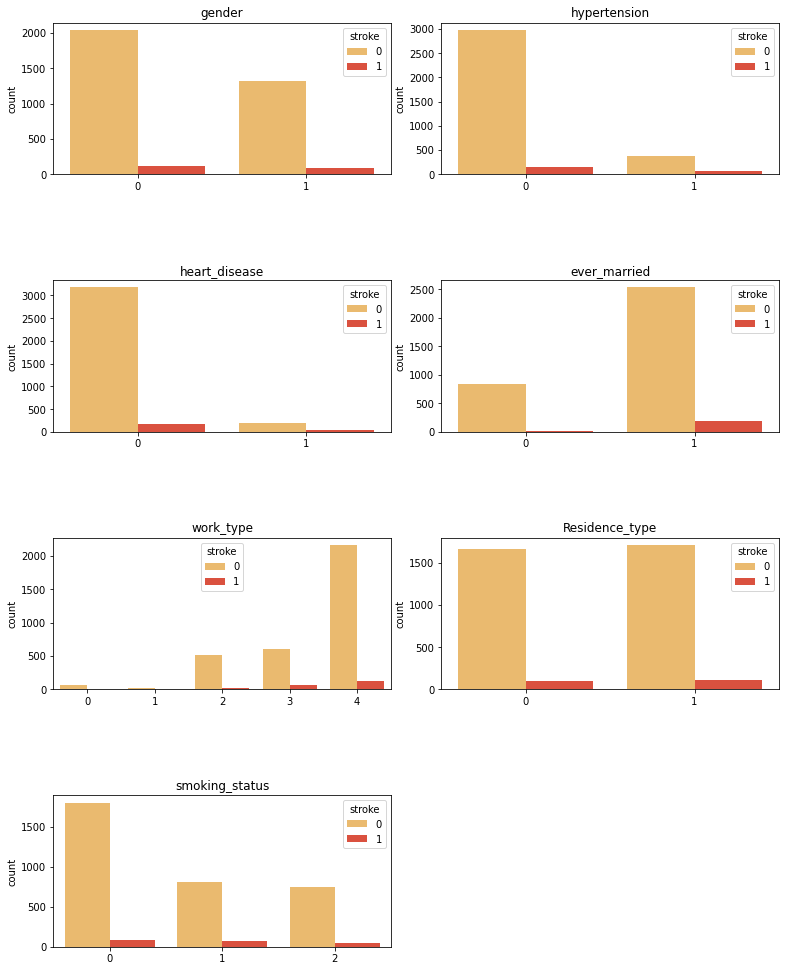

In [104]:
cata_d= d_c[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'smoking_status']]
fig = plt.figure(figsize=(13, 17))
for a, b in enumerate(cata_d.columns):
    ax = plt.subplot(4, 2, a+1)
    ax.set_title(b)
    sns.countplot(cata_d[b], palette='YlOrRd', hue=d_c['stroke'])  #Parameter hue is used to divide stroke samples
    ax.set_xlabel('')
plt.subplots_adjust(wspace=0.15, hspace=0.7)
plt.show()

In [105]:
for i in np.arange(d_c.shape[1] - 1):
    cross_table = pd.crosstab(d_c.iloc[:, i], d_c['stroke'], margins=True)
    x2, p, df, _ = chi2_contingency(cross_table) #Direct substitution for chi square
    print(d_c.columns[i], x2, p)

gender 0.8716137812009696 0.9285974900730578
hypertension 64.71830298112343 2.9499459867055033e-13
heart_disease 59.660487499068196 3.418744965272546e-12
ever_married 21.73769492991794 0.00022601021569649768
work_type 17.368638869724478 0.06659464267412239
Residence_type 0.22096279646002984 0.994328360000274
smoking_status 11.436499963124014 0.07578705182731044


In [106]:
print(d)

      Unnamed: 0  gender  age  hypertension  heart_disease  ever_married  \
0              0       1   67             0              1             1   
1              1       0   61             0              0             1   
2              2       1   80             0              1             1   
3              3       0   49             0              0             1   
4              4       0   79             1              0             1   
...          ...     ...  ...           ...            ...           ...   
3561        3561       0   57             0              0             1   
3562        3562       0   80             1              0             1   
3563        3563       0   81             0              0             1   
3564        3564       0   35             0              0             1   
3565        3565       1   51             0              0             1   

      work_type  Residence_type  avg_glucose_level        bmi  smoking_status  \
0     

In [107]:
pd.get_dummies(d)

,Unnamed: 0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bmi,age_hypertension,age_heart_disease,age_avg_glucose_level,work_type_Residence_type,ever_married_smoking_status,ever_married_heart_disease,bmi_heart_disease
0,0,1,67,0,1,1,4,1,228.69,36.600000,1,1,1.460957,-0.367885,3.718137,2.537525,1.244566,0.587198,4.070197,4.622325
1,1,0,61,0,0,1,3,0,202.21,28.893237,0,1,0.416605,-0.367885,-0.257769,1.762882,-0.951165,-0.715009,-0.245688,-0.257341
2,2,1,80,0,1,1,4,0,105.92,32.500000,0,1,1.684754,-0.367885,4.489581,0.761663,-0.951165,-0.715009,4.070197,4.075696
3,3,0,49,0,0,1,4,1,171.23,34.400000,2,1,0.300183,-0.367885,-0.257769,0.740056,1.244566,1.889406,-0.245688,-0.257341
4,4,0,79,1,0,1,3,0,174.12,24.000000,0,1,0.618768,3.361187,-0.257769,2.131264,-0.951165,-0.715009,-0.245688,-0.257341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3561,3561,0,57,0,0,1,4,0,77.93,21.700000,0,0,-0.379231,-0.367885,-0.257769,-0.283735,-0.951165,-0.715009,-0.245688,-0.257341
3562,3562,0,80,1,0,1,4,1,83.75,28.893237,0,0,1.247849,3.408390,-0.257769,0.301766,1.244566,-0.715009,-0.245688,-0.257341
3563,3563,0,81,0,0,1,3,1,125.20,40.000000,0,0,2.653832,-0.367885,-0.257769,1.194075,0.695633,-0.715009,-0.245688,-0.257341
3564,3564,0,35,0,0,1,3,0,82.99,30.600000,0,0,-0.630435,-0.367885,-0.257769,-0.682375,-0.951165,-0.715009,-0.245688,-0.257341


In [108]:
#d['gender'] = d['gender'].apply(lambda x: 1 if x == 'Male' else 0)  # Assign values to binary variables in the original data
#d['ever_married'] = d['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)
#d['Residence_type'] = d['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0) 
#d = d[d['smoking_status'] != 'Unknown']  # Delete the data of smoking history variable 'unknown'
# Using map mapping function to classify multiple variables
#d['smoking_status'] = d['smoking_status'].map({'smokes': 2, 'formerly smoked': 1, 'never smoked': 0}) 
#d['work_type'] = d['work_type'].map({'Private': 4, 'Self-employed': 3, 'Govt_job': 2, 'Never_worked': 1, 'children': 0}) 


<Figure size 720x432 with 0 Axes>

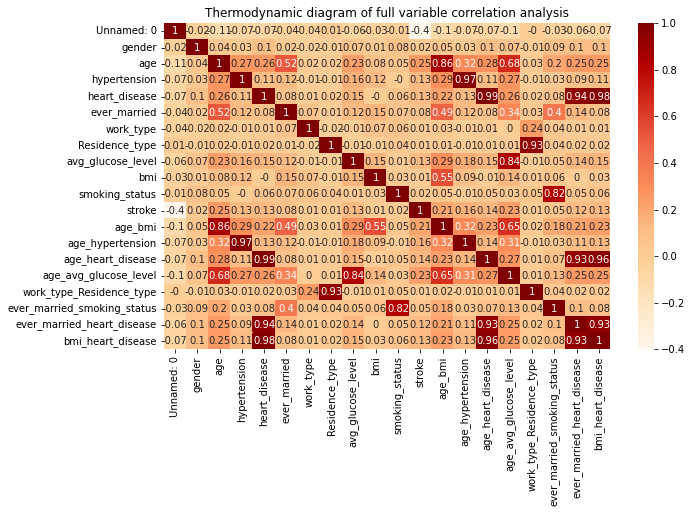

In [109]:
var_cor = round(d.corr(), 2)  # Calculate correlation
plt.figure(figsize=(10,6))
f, ax= plt.subplots(figsize = (10, 6))
sns.heatmap(data=var_cor, annot=True, cmap='OrRd') 
plt.title('Thermodynamic diagram of full variable correlation analysis', fontproperties='SimHei', fontsize=12)
plt.show()

In [110]:
stroke = round(100 * d['stroke'].sum()/len(d['stroke']), 2) 
print(stroke)  # The proportion of stroke is only 5.66%, which is low.

5.66


In [111]:
#d=pd.read_csv('washed_newfeatures.csv')

In [112]:
train_set,test_set = train_test_split(d,stratify=d['stroke'], random_state=1) # 参数stratify用来指定按照中风变量进行分层抽样

In [113]:
train_set_y = train_set['stroke']           # Prepare the target variables of the training set
train_set_x = train_set.drop(columns=['stroke'])    # Prepare the characteristic variables of the training set
test_set_y = test_set['stroke']            # Prepare the target variables of the test set
test_set_x = test_set.drop(columns=['stroke'])    # Prepare the characteristic variables of the test set
scaler = StandardScaler()               # The characteristic variables of training set and test set are standardized
train_set_x = scaler.fit_transform(train_set_x)
test_set_x = scaler.transform(test_set_x)

In [127]:
smote=SMOTE()
train_set_x,train_set_y=smote.fit_resample(train_set_x,train_set_y)
test_set_x,test_set_y=smote.fit_resample(test_set_x,test_set_y)

In [128]:
print(train_set_x.shape,train_set_y.shape,test_set_x.shape,test_set_y.shape)

(5046, 19) (5046,) (1682, 19) (1682,)


In [129]:
train_set_y.to_csv("train_set_y.csv")
test_set_y.to_csv("test_set_y.csv")

In [130]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def model_eva(model, train_x, train_y, test_x, test_y):
    model.fit(train_x, train_y)
    score = model.score(test_x, test_y)
    pre = model.predict(test_x)
    print('The test set accuracy is：', score)
    cm = confusion_matrix(test_y, pre)
    ConfusionMatrixDisplay(cm).plot(cmap='YlOrRd')
    plt.show()

The test set accuracy is： 0.9887039239001189


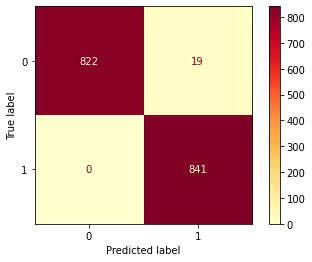

In [131]:
from sklearn.linear_model import LogisticRegression

logistic_fit = LogisticRegression()  # Build a logistic regression model object
model_eva(logistic_fit, train_set_x, train_set_y, test_set_x, test_set_y)  # Bring the built model along with the training and testing datasets into the function we created

The test set accuracy is： 1.0


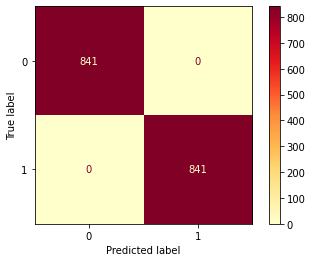

In [132]:
from sklearn.tree import DecisionTreeClassifier
dtc_fit = DecisionTreeClassifier(random_state=1)  # Build a decision tree model object
model_eva(dtc_fit, train_set_x, train_set_y, test_set_x, test_set_y)

The test set accuracy is： 0.8317479191438764


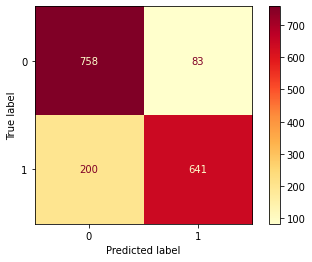

In [133]:
from sklearn.neighbors import KNeighborsClassifier
knc_fit = KNeighborsClassifier()  # Build k-nearest neighbors model objects
model_eva(knc_fit, train_set_x, train_set_y, test_set_x, test_set_y)

The test set accuracy is： 0.9738406658739596


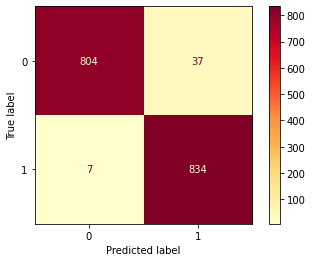

In [134]:
from sklearn.svm import SVC
svc_fit = SVC(kernel='rbf')  # Build the Support Vector Machine Model Object of Radial Basis Kernel Function
model_eva(svc_fit, train_set_x, train_set_y, test_set_x, test_set_y)

The test set accuracy is： 1.0


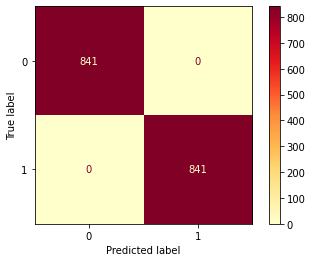

In [135]:
from sklearn.ensemble import RandomForestClassifier
rfc_fit = RandomForestClassifier(random_state=3)  # Build a random forest model object
model_eva(rfc_fit, train_set_x, train_set_y, test_set_x, test_set_y)

The test set accuracy is： 1.0


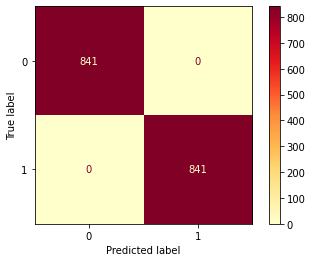

In [136]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_fit = GradientBoostingClassifier(random_state=6)  # Build a Gradient Boosting Algorithm Object
model_eva(gbc_fit, train_set_x, train_set_y, test_set_x, test_set_y)

The test set accuracy is： 0.9916765755053508


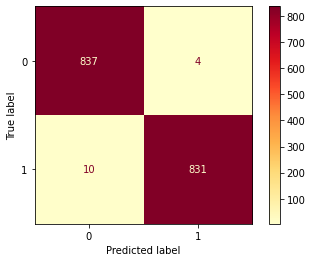

In [137]:
from sklearn.linear_model import SGDClassifier
sgd_fit = SGDClassifier(random_state=12)  # Build Gradient Descent Algorithm Object
model_eva(sgd_fit, train_set_x, train_set_y, test_set_x, test_set_y)

In [138]:
from sklearn import metrics
def roc_com(names, models, colors, train_x, train_y, test_x, test_y):
# Among the model parameters, names, models and colors are in list format, which store the name of the model, model class and line color respectively; the last four parameters are the feature variables of the training set, the target variables and the features of the test set.
    plt.figure(figsize=(7, 7))
    plt.rcParams['font.sans-serif'] = ['SimHei']
    for (name, model, color) in zip(names, models, colors):
        model.fit(train_x, train_y)  
        pre_prob = model.predict_proba(test_x)[:, 1]  # The probability that the test set is predicted to be positive by the classifier
        fpr, tpr, thresholds = metrics.roc_curve(test_y, pre_prob, pos_label=1)  # Calculate false positive rate, true positive rate and threshold
        model_auc = round(metrics.auc(fpr, tpr), 3)
        plt.plot(fpr, tpr, lw=3, label=f'{name}AUC={model_auc}', color=color)
    plt.plot([0, 1], [0, 1], '--', lw=3, color='black')
    plt.axis('square')
    plt.xlabel('false positive rate', fontsize=15)
    plt.ylabel('true positive rate', fontsize=15)
    plt.title('Comparison of ROC curves of various models', fontsize=20)
    plt.legend(loc='lower right', fontsize=15)
    plt.show()


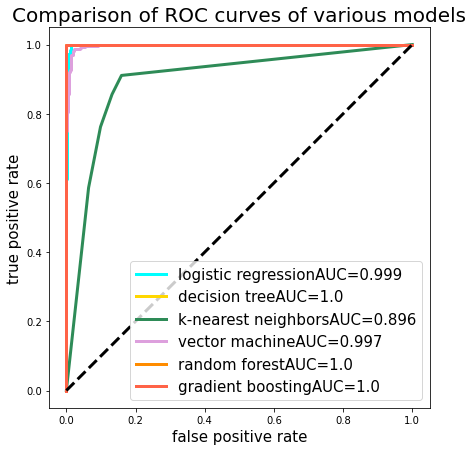

In [139]:

logistic_fit = LogisticRegression()  # Objects for building logistic regression models
dtc_fit = DecisionTreeClassifier(random_state=1)  # Build a decision tree model object
knc_fit = KNeighborsClassifier()  # BUild k-neighbor model objects
svc_fit = SVC(kernel='rbf', probability=True)  # Build the Support Vector Machine Model Object of Radial Basis Kernel Function
rfc_fit = RandomForestClassifier(random_state=3)  # Build a random forest model object
gbc_fit = GradientBoostingClassifier(random_state=6)  # Build a gradient boosting algorithm model object
model_name = ['logistic regression', 'decision tree', 'k-nearest neighbors', 'vector machine', 'random forest', 'gradient boosting', 'gradient descent']  # A list of model names
model_type = [logistic_fit, dtc_fit, knc_fit, svc_fit, rfc_fit, gbc_fit]  # A list of model objects (the SGDC classifier model SGDClassifier is not selected in the list)，
# Because the loss function defaults to the hinge function, the probability of the predicted value cannot be obtained. It needs to be calibrated by CalibratedClassifierCV to calculate the probability value of the former)
roc_color = ['cyan', 'gold', 'seagreen', 'plum', 'darkorange', 'tomato']  # A list of line colors
roc_com(model_name, model_type, roc_color, train_set_x, train_set_y, test_set_x, test_set_y)
